<a href="https://colab.research.google.com/github/Pasindusameera/Deep_learning_Basics/blob/main/regression7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### Download dataset from Kaggle

In [2]:
!pip install opendatasets -q

In [3]:
import opendatasets as od

Dataset Link: https://www.kaggle.com/datasets/andonians/random-linear-regression

In [4]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pasinduperera878
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 13.2MB/s]

In [5]:
data = pd.read_csv("random-linear-regression/test.csv")

In [ ]:
# # Load downloaded dataset
# data = pd.read_csv("dataset.csv")

### Data Preprocessing

In [6]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [7]:
data.shape

(300, 2)

In [8]:
X = data["x"]
y = data["y"]

In [9]:
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

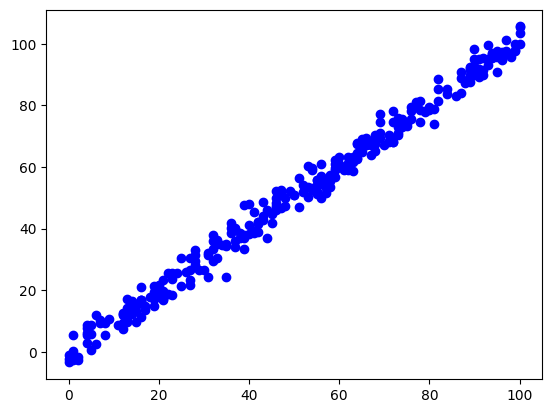

In [10]:
plt.scatter(X, y, c='b')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape

((240,), (60,))

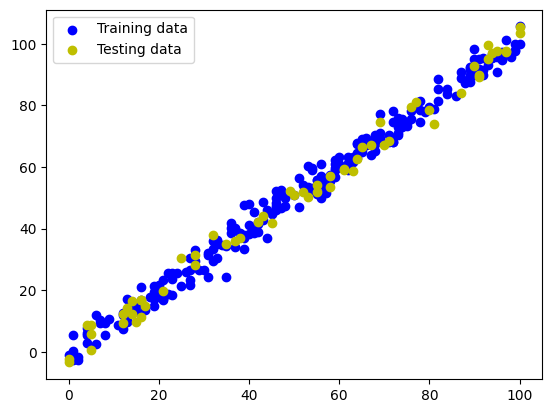

In [13]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

### Model Building

In [14]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4
8/8 [==============================] - 1s 4ms/step - loss: 80.8363 - mae: 80.8363
Epoch 2/4
8/8 [==============================] - 0s 4ms/step - loss: 63.5408 - mae: 63.5408
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 47.0599 - mae: 47.0599
Epoch 4/4
8/8 [==============================] - 0s 3ms/step - loss: 30.9752 - mae: 30.9752


In [ ]:
X_train.shape

In [16]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[52.483852 ],
       [44.46259  ],
       [54.775642 ],
       [ 3.7833111],
       [53.0568   ]], dtype=float32)

In [19]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

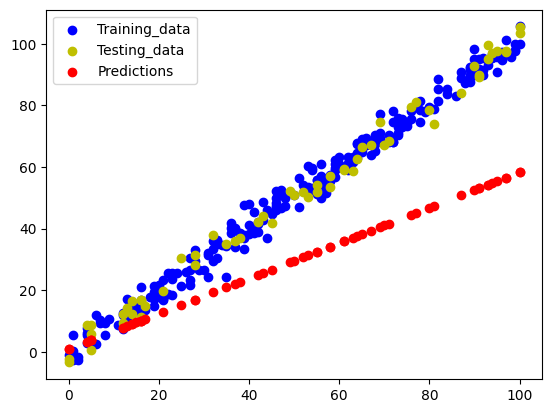

In [20]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

### Evaluate Model

In [21]:
# Using evaluate method
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 9ms/step - loss: 20.8272 - mae: 20.8272


[20.82718849182129, 20.82718849182129]

In [ ]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

In [23]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=619.9617>

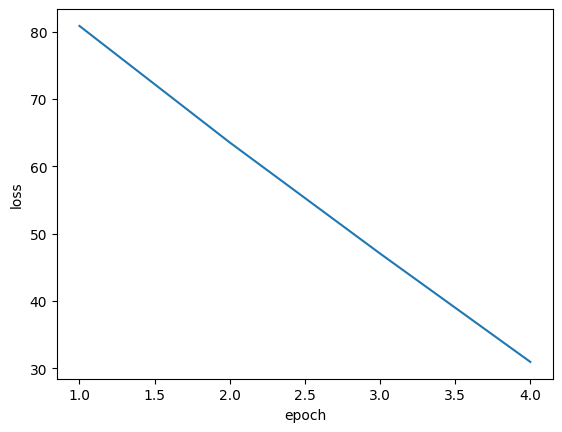

In [24]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Model Weights and Baises

In [25]:
# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[-1.3206753  -0.50687516  0.12453329  0.19973972]] 
Biases:
 [-0.34924522  0.2905057  -0.305552    0.31239262]

Weights:
 [[-0.43446016]
 [ 0.16602221]
 [-0.5395862 ]
 [ 0.7535593 ]] 
Biases:
 [0.31833214]
